In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Import des données

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
# Download du fichier
id = '1XIRDvsw_OBSRSBrBl3yfJcFBl7V-kMJh'
downloaded = drive.CreateFile({'id': '1XIRDvsw_OBSRSBrBl3yfJcFBl7V-kMJh'})
downloaded.GetContentFile('atmospheric-concentration-of-carbon-dioxide-5.csv')

In [0]:
#https://drive.google.com/file/d/1XIRDvsw_OBSRSBrBl3yfJcFBl7V-kMJh/view?usp=sharing

In [0]:
GES = pd.read_csv('atmospheric-concentration-of-carbon-dioxide-5.csv')
GES.head(10)

,Year:year,Value:number,Polutant:text
0,1750,278.0,CO2 (ppm)
1,1755,278.0,CO2 (ppm)
2,1760,278.0,CO2 (ppm)
3,1765,278.0,CO2 (ppm)
4,1770,278.6,CO2 (ppm)
5,1775,279.3,CO2 (ppm)
6,1780,280.1,CO2 (ppm)
7,1785,280.8,CO2 (ppm)
8,1790,281.6,CO2 (ppm)
9,1795,282.3,CO2 (ppm)


In [0]:
GES.tail(2)

,Year:year,Value:number,Polutant:text
259,2017,330.31,N2O (ppb)
260,2018,NaN,N2O (ppb)


In [0]:
#https://drive.google.com/file/d/1iybQRgupTsgauHMLKZaHaJL4J6oH6QZw/view?usp=sharing

In [0]:
#temperature
id = '1iybQRgupTsgauHMLKZaHaJL4J6oH6QZw'
downloaded = drive.CreateFile({'id': '1iybQRgupTsgauHMLKZaHaJL4J6oH6QZw'})
downloaded.GetContentFile('Global_temp_anomaly.csv')

In [0]:
TEMP = pd.read_csv('Global_temp_anomaly.csv')
TEMP.head(2)

,Unnamed: 0,Year,Value
0,1,1961,0.207
1,2,1962,0.034


In [0]:
print(TEMP.dtypes)
print()
print(GES.dtypes)

Unnamed: 0      int64
Year            int64
Value         float64
dtype: object
Year:year          int64
Value:number     float64
Polutant:text     object
dtype: object


In [0]:
print(TEMP.shape)
print()
print(GES.shape)

(59, 3)

(261, 3)


In [0]:
print(TEMP.info())
print()
print(GES.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  59 non-null     int64  
 1   Year        59 non-null     int64  
 2   Value       59 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.5 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year:year      261 non-null    int64  
 1   Value:number   259 non-null    float64
 2   Polutant:text  261 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ KB
None


In [0]:
df_GES_TEMP = GES.merge(TEMP, how='outer', left_on='Year:year', right_on='Year').copy()

In [0]:
df_GES_TEMP.head()

,Year:year,Value:number,Polutant:text,Unnamed: 0,Year,Value
0,1750.0,278.00,CO2 (ppm),NaN,NaN,NaN
1,1750.0,719.01,CH4 (ppb),NaN,NaN,NaN
2,1750.0,270.00,N2O (ppb),NaN,NaN,NaN
3,1755.0,278.00,CO2 (ppm),NaN,NaN,NaN
4,1755.0,719.97,CH4 (ppb),NaN,NaN,NaN


In [0]:
df_GES_TEMP.tail()

,Year:year,Value:number,Polutant:text,Unnamed: 0,Year,Value
271,NaN,NaN,NaN,13.0,1973.0,0.275
272,NaN,NaN,NaN,14.0,1974.0,-0.181
273,NaN,NaN,NaN,16.0,1976.0,-0.311
274,NaN,NaN,NaN,17.0,1977.0,0.271
275,NaN,NaN,NaN,59.0,2019.0,1.473


In [0]:
df_GES_TEMP.shape


(276, 6)

In [0]:
df_GES_TEMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 275
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year:year      261 non-null    float64
 1   Value:number   259 non-null    float64
 2   Polutant:text  261 non-null    object 
 3   Unnamed: 0     147 non-null    float64
 4   Year           147 non-null    float64
 5   Value          147 non-null    float64
dtypes: float64(5), object(1)
memory usage: 15.1+ KB


In [0]:
df_GES_TEMP.dropna(inplace=True)

In [0]:
print(df_GES_TEMP.shape)
print()
print(df_GES_TEMP.info())

(130, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 129 to 258
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year:year      130 non-null    float64
 1   Value:number   130 non-null    float64
 2   Polutant:text  130 non-null    object 
 3   Unnamed: 0     130 non-null    float64
 4   Year           130 non-null    float64
 5   Value          130 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.1+ KB
None


#visualisations de vérification

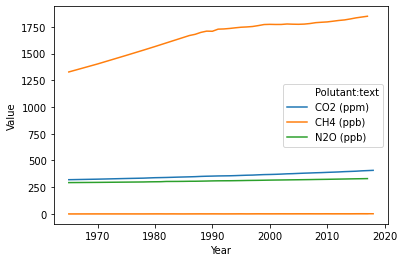

In [0]:
sns.lineplot('Year', 'Value:number', data=df_GES_TEMP, hue='Polutant:text')
sns.lineplot('Year', 'Value', data=df_GES_TEMP) #forcément ^^

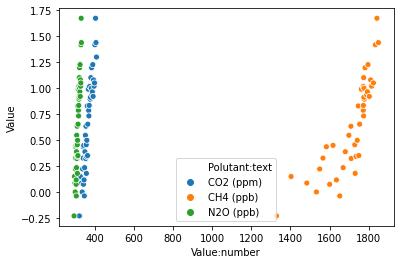

In [0]:
sns.scatterplot('Value:number','Value', data=df_GES_TEMP, hue='Polutant:text')

#CREATION d'un DF pour chaque GES

##CO2

In [0]:
CO2 = df_GES_TEMP[df_GES_TEMP['Polutant:text']=='CO2 (ppm)']

In [0]:
CO2.shape

(44, 6)

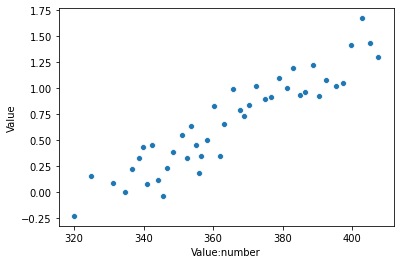

In [0]:
sns.scatterplot('Value:number','Value', data=CO2)

In [0]:
CO2.corr()

,Year:year,Value:number,Unnamed: 0,Year,Value
Year:year,1.000000,0.994224,1.000000,1.000000,0.922373
Value:number,0.994224,1.000000,0.994224,0.994224,0.928247
Unnamed: 0,1.000000,0.994224,1.000000,1.000000,0.922373
Year,1.000000,0.994224,1.000000,1.000000,0.922373
Value,0.922373,0.928247,0.922373,0.922373,1.000000


##CH4

In [0]:
CH4 = df_GES_TEMP[df_GES_TEMP['Polutant:text']=='CH4 (ppb)']

In [0]:
CH4.shape

(43, 6)

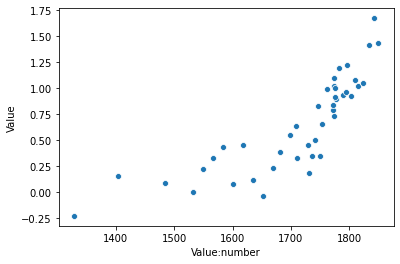

In [0]:
sns.scatterplot('Value:number','Value', data=CH4)
plt.show()

In [0]:
CH4.corr()

,Year:year,Value:number,Unnamed: 0,Year,Value
Year:year,1.000000,0.934836,1.000000,1.000000,0.918643
Value:number,0.934836,1.000000,0.934836,0.934836,0.817417
Unnamed: 0,1.000000,0.934836,1.000000,1.000000,0.918643
Year,1.000000,0.934836,1.000000,1.000000,0.918643
Value,0.918643,0.817417,0.918643,0.918643,1.000000


##NO2

In [0]:
N2O = df_GES_TEMP[df_GES_TEMP['Polutant:text']=='N2O (ppb)']

In [0]:
N2O.shape

(43, 6)

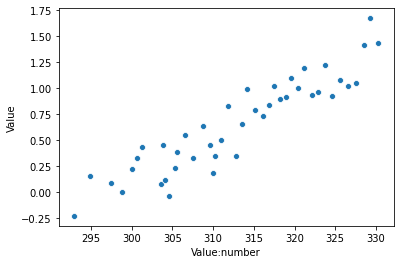

In [0]:
sns.scatterplot('Value:number','Value', data=N2O)
plt.show()

In [0]:
N2O.corr()

,Year:year,Value:number,Unnamed: 0,Year,Value
Year:year,1.000000,0.997321,1.000000,1.000000,0.918643
Value:number,0.997321,1.000000,0.997321,0.997321,0.921209
Unnamed: 0,1.000000,0.997321,1.000000,1.000000,0.918643
Year,1.000000,0.997321,1.000000,1.000000,0.918643
Value,0.918643,0.921209,0.918643,0.918643,1.000000


#Représentation regressions linéaires/polynomiales

##CO2

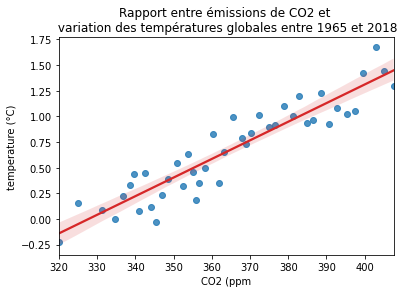

In [0]:
sns.regplot('Value:number', 'Value', data=CO2, scatter_kws={'color' : 'C10'}, line_kws={'color' : 'C3'})
plt.title('Rapport entre émissions de CO2 et \n variation des températures globales entre 1965 et 2018')
plt.ylabel('temperature (°C)')
plt.xlabel('CO2 (ppm')
plt.show()

##NH4

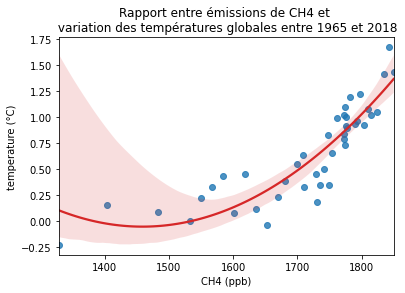

In [0]:
sns.regplot('Value:number', 'Value', data=CH4,order=2, scatter_kws={'color' : 'C10'}, line_kws={'color' : 'C3'})
plt.title('Rapport entre émissions de CH4 et \n variation des températures globales entre 1965 et 2018')
plt.ylabel('temperature (°C)')
plt.xlabel('CH4 (ppb)')
plt.show()

##N2O

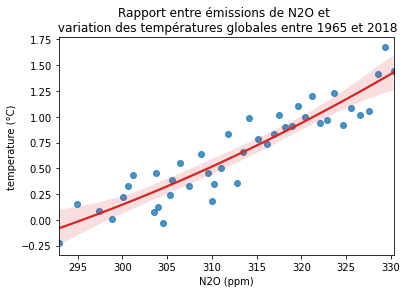

In [0]:
sns.regplot('Value:number', 'Value', data=N2O,order=2, scatter_kws={'color' : 'C10'}, line_kws={'color' : 'C3'})
plt.title('Rapport entre émissions de N2O et \n variation des températures globales entre 1965 et 2018')
plt.ylabel('temperature (°C)')
plt.xlabel('N2O (ppm)')
plt.show()

#Previsions

##CO2

In [0]:
#prevision augmentation production co2
x_prodco2 = CO2['Year']
y_prodco2 = CO2['Value:number']
model_prodco2 = np.polyfit(x_prodco2, y_prodco2, deg=2)

In [0]:
#prévision augmentation de la temperature avec co2
x_tempco2 = CO2['Value:number']
y_tempco2 = CO2['Value']
model_tempco2 = np.polyfit(x_tempco2, y_tempco2 , deg=1)

##CH4

In [0]:
#prevision augmentation production ch4
x_prodch4 = CH4['Year']
y_prodch4 = CH4['Value:number']
model_prodch4 = np.polyfit(x_prodch4, y_prodch4, deg=4)

In [0]:
#prévision augmentation de la temperature avec ch4
x_tempch4 = CH4['Value:number']
y_tempch4 = CH4['Value']
model_tempch4 = np.polyfit(x_tempch4, y_tempch4, deg=1)

##N2O

In [0]:
#prevision augmentation production n2o
x_prodn2o = N2O['Year']
y_prodn2o = N2O['Value:number']
model_prodn2o = np.polyfit(x_prodn2o, y_prodn2o, deg=2)

In [0]:
#prévision augmentation de la temperature avec n2o
x_tempn2o = N2O['Value:number']
y_tempn2o = N2O['Value']
model_tempn2o = np.polyfit(x_tempn2o, y_tempn2o, deg=1)

In [0]:
co2 = []
temp_var_co2 = []
ch4 = []
temp_var_ch4 = []
n2o = []
temp_var_n2o = []

for i in range (2020, 2110, 10):
  Prod_CO2 = np.poly1d(model_prodco2)(i)
  Prod_CH4 = np.poly1d(model_prodch4)(i)
  Prod_N2O = np.poly1d(model_prodn2o)(i)
  co2.append(Prod_CO2)
  ch4.append(Prod_CH4)
  n2o.append(Prod_N2O)
  temp_var_co2.append(np.poly1d(model_tempco2)(Prod_CO2))
  temp_var_ch4.append(np.poly1d(model_tempch4)(Prod_CH4))
  temp_var_n2o.append(np.poly1d(model_tempn2o)(Prod_N2O))

In [0]:
predics_GES_temp = pd.DataFrame(pd.Series([2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]))
predics_GES_temp['co2_p'] = pd.Series(co2)
predics_GES_temp['temp_var_co2'] = pd.Series(temp_var_co2)
predics_GES_temp['ch4_p'] = pd.Series(ch4)
predics_GES_temp['temp_var_ch4'] = pd.Series(temp_var_ch4)
predics_GES_temp['n2o_p'] = pd.Series(n2o)
predics_GES_temp['temp_var_n2o'] = pd.Series(temp_var_n2o)

In [0]:
predics_GES_temp['t_aug_moy'] = (predics_GES_temp['temp_var_co2']+predics_GES_temp['temp_var_n2o'])/2

In [0]:
predics_GES_temp.rename(columns={0 :'year'}, inplace = True)

In [0]:
predics_GES_temp.head(2)

,year,co2_p,temp_var_co2,ch4_p,temp_var_ch4,n2o_p,temp_var_n2o,t_aug_moy
0,2020,410.981976,1.510184,1916.225205,1.301981,332.883124,1.478243,1.494214
1,2030,435.332646,1.952156,2356.024798,2.671058,342.431926,1.869403,1.910780


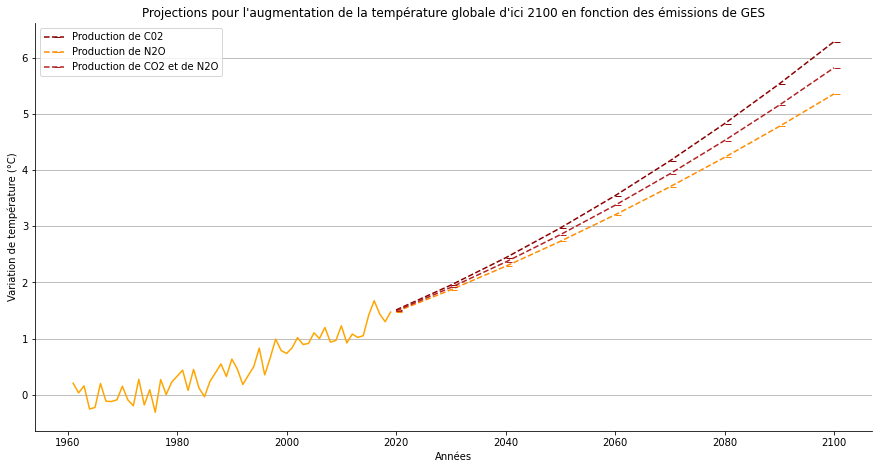

In [0]:
x_TEMP = TEMP['Year']
y_TEMP = TEMP['Value']

plt.figure(figsize=(15, 7.5))
sns.lineplot(x_TEMP, y_TEMP, color='orange').grid(axis='y')

plt.plot(predics_GES_temp['year'], predics_GES_temp['temp_var_co2'], linewidth=1.5, marker=True, linestyle='dashed', c='darkred', label=('Production de C02'))
plt.plot(predics_GES_temp['year'], predics_GES_temp['temp_var_n2o'], linewidth=1.5, marker=True, linestyle='dashed', c='darkorange', label=('Production de N2O'))
plt.plot(predics_GES_temp['year'], predics_GES_temp['t_aug_moy'], linewidth=1.5, marker=True, linestyle='dashed', c='firebrick', label=('Production de CO2 et de N2O')) 

plt.title('Projections pour l\'augmentation de la température globale d\'ici 2100 en fonction des émissions de GES')
plt.xlabel("Années")
plt.ylabel('Variation de température (°C)')
plt.legend()

sns.despine(top=True)
plt.show()

In [0]:
# augmentation de la température si produ de chaque augmente (et moyenne des 3 tp)
#df[aug_moy] = (temp_var_co2 + temp_var_ch4 +temp_var_n2o)/3